# Python Programming - Week 3 - Pair Assignment

### This is your assignment notebook.

In this notebook you and your partner will write your pair assignment. Steps for submitting the assignment will be described on Learn.

### How to edit a notebook that has more than code: 

In this notebook you can see there are:

- **code cells** - in these you can edit and run python code
- **markdown cells** - basically text cells, like the one you are reading now. When you are done editing them, 'Run' them as you would run your python code to make them pretty. They use the 'Markdown' text formatting language, so eg. starting a line with # or ## will make it a header, and surroounding something with two asterixes ** will make it bold

Double-click this cell to see how you can edit a markdown cell and then Run it with Shift+Enter to see it 'interpreted' into headers and styled text. 

- To change a type of cell, use dropdown in the menu on top.
- remember to save your work frequently with usual keyboard shortcut, or File > Save & Checkpoint

small notes:

- please do not rename the notebook file.
- use **+** plus icon in the menu to add new cells



# Your Week 3 assignment task: 

### Formulate and answer a business question using a dataset and methods you've seen in the notebooks so far.

Pick one of the datasets we have used in the notebooks you have seen so far. In the notebooks you have looked at the datasets and were guided through one or two simple tasks for each. Look at the data - what type of questions can they answer?

The question does not need to be complicated. Your task is to use python to operate on data, find answer and support it with a graph or well-crafted table.


### Deliverable:

In your notebook please include all the code that you used to arrive at the conclusion. Also 

At the end of your notebook, you should provide:

- a markdown (text) cell with your mini-report (200 words +/- 10%). For reference, 'Marking criteria' section below has around 220 words)
- a cell which will generate the graph or table that accompanies your mini-report (you are allowed to combine number of graphs, if they are combined into one unit and make sense, eg. combining 3 bar charts side by side, or overlapping a line chart with a bar chart).




### Marks:

You will get points in university marking system for each of the below categories. 

0- 50% : Unsafisfactory

50-60% : Good

60-70% : Very Good

70% +  : Excellent
 
Your grade will be the average of your points in all categories. This assignment is worth 10% of your grade for this course. You and your partner will get the same grade. Only one of you should submit the assignment.

### Marking Criteria:

**A) Business Question and Answer:** Did you manage to find a question that can be answered with given data? As an analyst you will often have to dive into available data and identify how it ccan help the business, or solve a problem, withou first knowing what the problem is. Also can you formulate a clear answer to the question you created?

**B) Using the Data:** How well did you use the data to answer your question? Your answer should be supported by what you found in the data. Briefly describe why this was the correct data, and correct analysis to perform on it.

**C) Visualisation:** Can you aid your argument/aswer with visual clues? Graph can say a thousand words, but it is also easy to make one which is confusing, or misleading. Use simple (or highly customised) graphs to make your argument clearer.

**D) Code Quality:** Is your code clean, readable and DRY (Don't repeat yourself)? Are you using good readable variable names? Did you clean up your code and does it not include enay old/unused parts?

**E) Code Structure:** Is your code well structured and broken down? Just like good writing has sentences, paragraphs and chapters, good code should be split into sections. Breakdown your code into cells and functions. Use meaningful signposts (eg. comments, function names) to guide the reader through your code.


### Difficulty:

This assignment should not take you and your partner more than 1-2h. You can take one of the notebooks you liked working on and extract from it only the sections that helped you to address the question you decided on. There are not extra points for making the question DIFFICULT, but you are graded for CLEAN CODE and COMMUNICATING clearly.

# Your submission goes below:

In [ ]:
# You can put your code here and below. Feel free to add more cells

In [1]:
#First, import the necessary libraries:

# General library
import numpy as np
import pandas as pd
import math

# Machine learning and dataset library
import sklearn.datasets as datasets 

# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the diabates dataset from sklearn 
dataset = datasets.load_diabetes()
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# Create a dataframe for all the feature names as independent variables
diabetes_data = pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])

# Create a dataframe for a dependent variable disease progression or 'disease_prog'
disease_prog = pd.DataFrame(data=dataset['target'],columns=['target'])
# Combine dependent variable 'disease_prog' into the dataframe 'diabetes_data' 
diabetes_data['disease_prog'] = disease_prog

# Rename column s1 - s6 using the reference from sklearn datasets in order to be more intepretable
diabetes_data = diabetes_data.rename({'s1': 'tc', 's2': 'ldl', 's3': 'hdl', 's4': 'tch', 's5': 'ltg', 's6': 'glu'}, axis='columns')

# Print and check the diabetes_data and its shape
print(diabetes_data.head(5))
print("\n")
print('The diabetes dataset has',diabetes_data.shape[0],'rows and',diabetes_data.shape[1],'columns.')

        age       sex       bmi        bp        tc       ldl       hdl  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

        tch       ltg       glu  disease_prog  
0 -0.002592  0.019908 -0.017646         151.0  
1 -0.039493 -0.068330 -0.092204          75.0  
2 -0.002592  0.002864 -0.025930         141.0  
3  0.034309  0.022692 -0.009362         206.0  
4 -0.002592 -0.031991 -0.046641         135.0  


The diabetes dataset has 442 rows and 11 columns.


In [4]:
# As we can see all of the independent variables have standardized to normal scale. 
# So, we also need to normalize dependent variable 'disease_prog' into the same scale. 

# Import StandardScaler function from sklearn library to preprocessing data
from sklearn.preprocessing import StandardScaler

# Create object 'ss' and standardize 'disease_prog' to follow normal distribution 
ss = StandardScaler()
disease_prog_norm = pd.DataFrame(ss.fit_transform(disease_prog))

# Replace existing 'disease_prog' column in diabetes_data with standardized data
diabetes_data['disease_prog'] = disease_prog_norm

# Print and check the disease_prog scale after normalization
print(diabetes_data)


          age       sex       bmi        bp        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu  disease_prog  
0   -0.002592  0.019908 -

In [5]:
# Since all of the variables, including 'bmi' have been made normalize. We use the mean and standard deviation of that sample to convert the 'treshold_bmi' data into the same scale.
# We use this link to get the mean and standard deviaton of data https://www4.stat.ncsu.edu/~boos/var.select/diabetes.read.tab.out.txt

# Create a new list containing bmi threshold to classify data based on weight status
threshold_bmi = [18.5,25.0,30,35,40]

#Create a function called 'threshold_normalization' to standardize the 'treshold_bmi' in a same scale with 'bmi' data within sklearn dataset.
def threshold_normalization(threshold_bmi):
    df_threshold_bmi = pd.DataFrame(threshold_bmi,columns=['bmi_norm'])
    threshold_bmi_norm = (df_threshold_bmi-26.3757919)/(4.4181216*math.sqrt(len(diabetes_data['bmi'])-1))
    return threshold_bmi_norm

# Print and check the normalization result
threshold_bmi_norm=threshold_normalization(threshold_bmi)
print(threshold_bmi_norm)

   bmi_norm
0 -0.084886
1 -0.014828
2  0.039062
3  0.092953
4  0.146843


In [6]:
# Create a function called threshold_bmi_normalization to classify the 'bmi' data based on 'threshold_bmi_norm'
# and put it into the new column within 'diabetes_data' called 'weight_status'
# WHO's weight status classification:  
# 1. Underweight: BMI < 18.5
# 2. Normal: 18.5<=BMI<25
# 3. Overweight: 25<=BMI<30
# 4. Obese I: 30<=BMI<35
# 5. Obese II: 35<=BMI<40
# 6. Obese III: BMI > 40

def threshold_bmi_normalization(diabetes_data,threshold_bmi_norm):
    for row in range(diabetes_data.shape[0]):
        if diabetes_data['bmi'][row]<threshold_bmi_norm.loc[0,'bmi_norm']:
            diabetes_data.loc[row,'weight_status']='underweight'

        elif diabetes_data['bmi'][row]<threshold_bmi_norm.loc[1,'bmi_norm']:
            diabetes_data.loc[row,'weight_status']='Normal range'

        elif diabetes_data['bmi'][row]<threshold_bmi_norm.loc[2,'bmi_norm']:
            diabetes_data.loc[row,'weight_status']='Overweight'

        elif diabetes_data['bmi'][row]<threshold_bmi_norm.loc[3,'bmi_norm']:
            diabetes_data.loc[row,'weight_status']='Obese class Ⅰ'

        elif diabetes_data['bmi'][row]<threshold_bmi_norm.loc[4,'bmi_norm']:
            diabetes_data.loc[row,'weight_status']='Obese class Ⅱ'
        else:
            diabetes_data.loc[row,'weight_status']='Obese class Ⅲ'
    return diabetes_data
    
# Run the threshold_bmi_normalization function
threshold_bmi_normalization(diabetes_data,threshold_bmi_norm)

# Print and check the weight_status column
print(diabetes_data.head())

        age       sex       bmi        bp        tc       ldl       hdl  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

        tch       ltg       glu  disease_prog  weight_status  
0 -0.002592  0.019908 -0.017646     -0.014719  Obese class Ⅰ  
1 -0.039493 -0.068330 -0.092204     -1.001659   Normal range  
2 -0.002592  0.002864 -0.025930     -0.144580  Obese class Ⅰ  
3  0.034309  0.022692 -0.009362      0.699513     Overweight  
4 -0.002592 -0.031991 -0.046641     -0.222496   Normal range  


In [ ]:
# your graph could be generated here. Please make it very clear which graph is the part of your mini-report

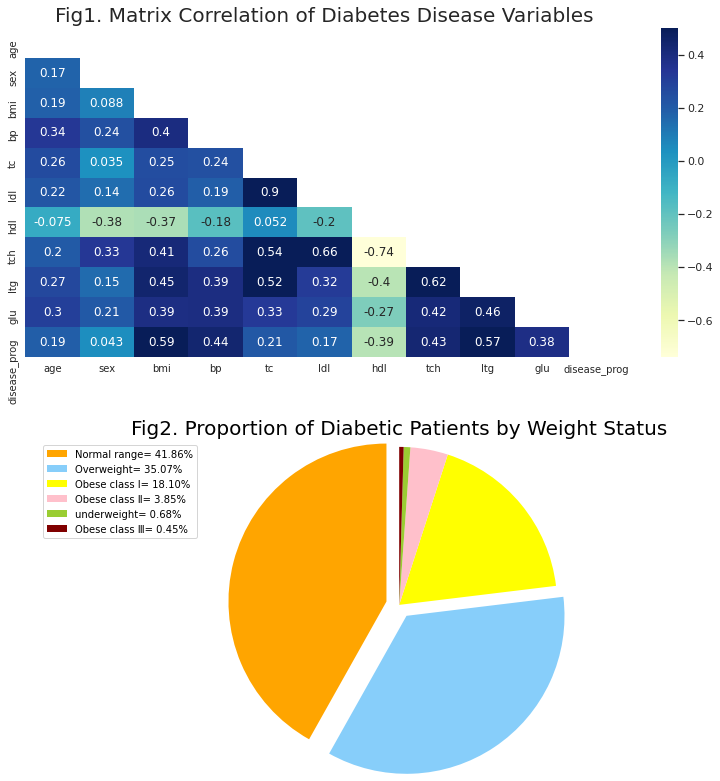

In [7]:
### We will use both graphs in our mini-report
## Figure 1: Create a Matrix Correlation using Seaborn library 
# Calculate the correlation value for each pair of variables
corr = diabetes_data.corr()

# Create a zero correlation to mask the upper right matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(11,11))

# Plot and configure the Matrix Correlation.
with sns.axes_style("white"):

    plt.subplot(2,1,1) #create a subplot chart with 2x1 size, and put the first graph to the (1,1) location
    sns.set(font_scale=1)
    ax = sns.heatmap(corr, mask=mask, vmax=.5, annot=True, cmap="YlGnBu")
    ax.axes.set_title("Fig1. Matrix Correlation of Diabetes Disease Variables",fontsize=20)

## Figure 2: Create a Pie Chart using Matplotlib library

# Create a 'label' variable to get the name of weight_status in order and a 'size' variabe to get count of diabetes people by weight_status
label = diabetes_data['weight_status'].value_counts().index
size = diabetes_data['weight_status'].value_counts()
proportion = 100.*size/size.sum()

# Plot and configure the properties of the Pie Chart
colors = ['orange','lightskyblue','yellow','pink','yellowgreen','maroon']
explode = (0.1,0.1,0,0,0,0)
plt.subplot(2,1,2)
plt.pie(size,explode=explode, colors=colors, startangle=90,radius=1.2)
labels = ['{0}= {1:1.2f}%'.format(i,j) for i,j in zip(label, proportion)]
plt.legend(labels, bbox_to_anchor=(-0.1, 1.),fontsize=10)
plt.title("Fig2. Proportion of Diabetic Patients by Weight Status", fontsize=20)
plt.tight_layout()
plt.show()


### Your minireport can be here

Click this cell to edit it. Run it with Shift+Enter to see how it will look when 'interpreted'.

### What features can affect disease progression of diabetes?

The number of individuals living with diabetes has risen dramatically over the years. Diabetes is now a leading cause of deaths and a variety of serious disorders. As a result, the goal of this report is to determine the association between a variety of parameters and disease progression using data from 422 diabetic patients.

Body mass index *(BMI)* and lamotrigine *(LTG)*, as shown in **Figure 1**, have the highest positive correlation with disease progression for values more than 0.57. In addition, the average blood pressure *(BP)*, thyroid-stimulating hormone *(TCH)*, and blood sugar level *(GLU)* correlate slightly with disease progression by 0.44, 043, and 0.38, respectively. In contrast, higher levels of high-density lipoproteins *(HDL)* have a 0.38 unfavourable effect on disease progression. Surprisingly, there is no correlation between age and disease progression.

Finally, let’s explore the highest correlation variable, BMI. Instead of analysing all values, we defined a new feature called ‘weight status’ using the World Health Organization *(WHO)* classification. There are six classifications: underweight, normal, overweight, obese I, obese II, and obese III, each with a specific BMI range. According to **Figure 2**, over 50% cumulative proportion of patients is classified as overweight *(35.07%)*, and obese *(22.40%)*. This additional feature could be useful in determining the pattern of disease progression and other related variables.